In [13]:
# 1. Clonamos YOLOv5 y preparamos entorno
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/Users/odremanferrer/Developer/mioti/MDLM/Deep Learning/Challenger final/notebooks/yolov5


In [14]:
# 2. Importamos librerías
import torch
from IPython.display import Image, display
import glob
import os

In [15]:
# 3. Entrenamiento más serio
!python train.py --img 640 --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt --project "runs/train" --name "exp_mas_serio"

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp_mas_serio, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/Users/odremanferrer/Developer/mioti/MDLM/Deep': No such file or directory
YOLOv5 🚀 2025-4-27 Python-3.9.21 torch-2.5.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmu

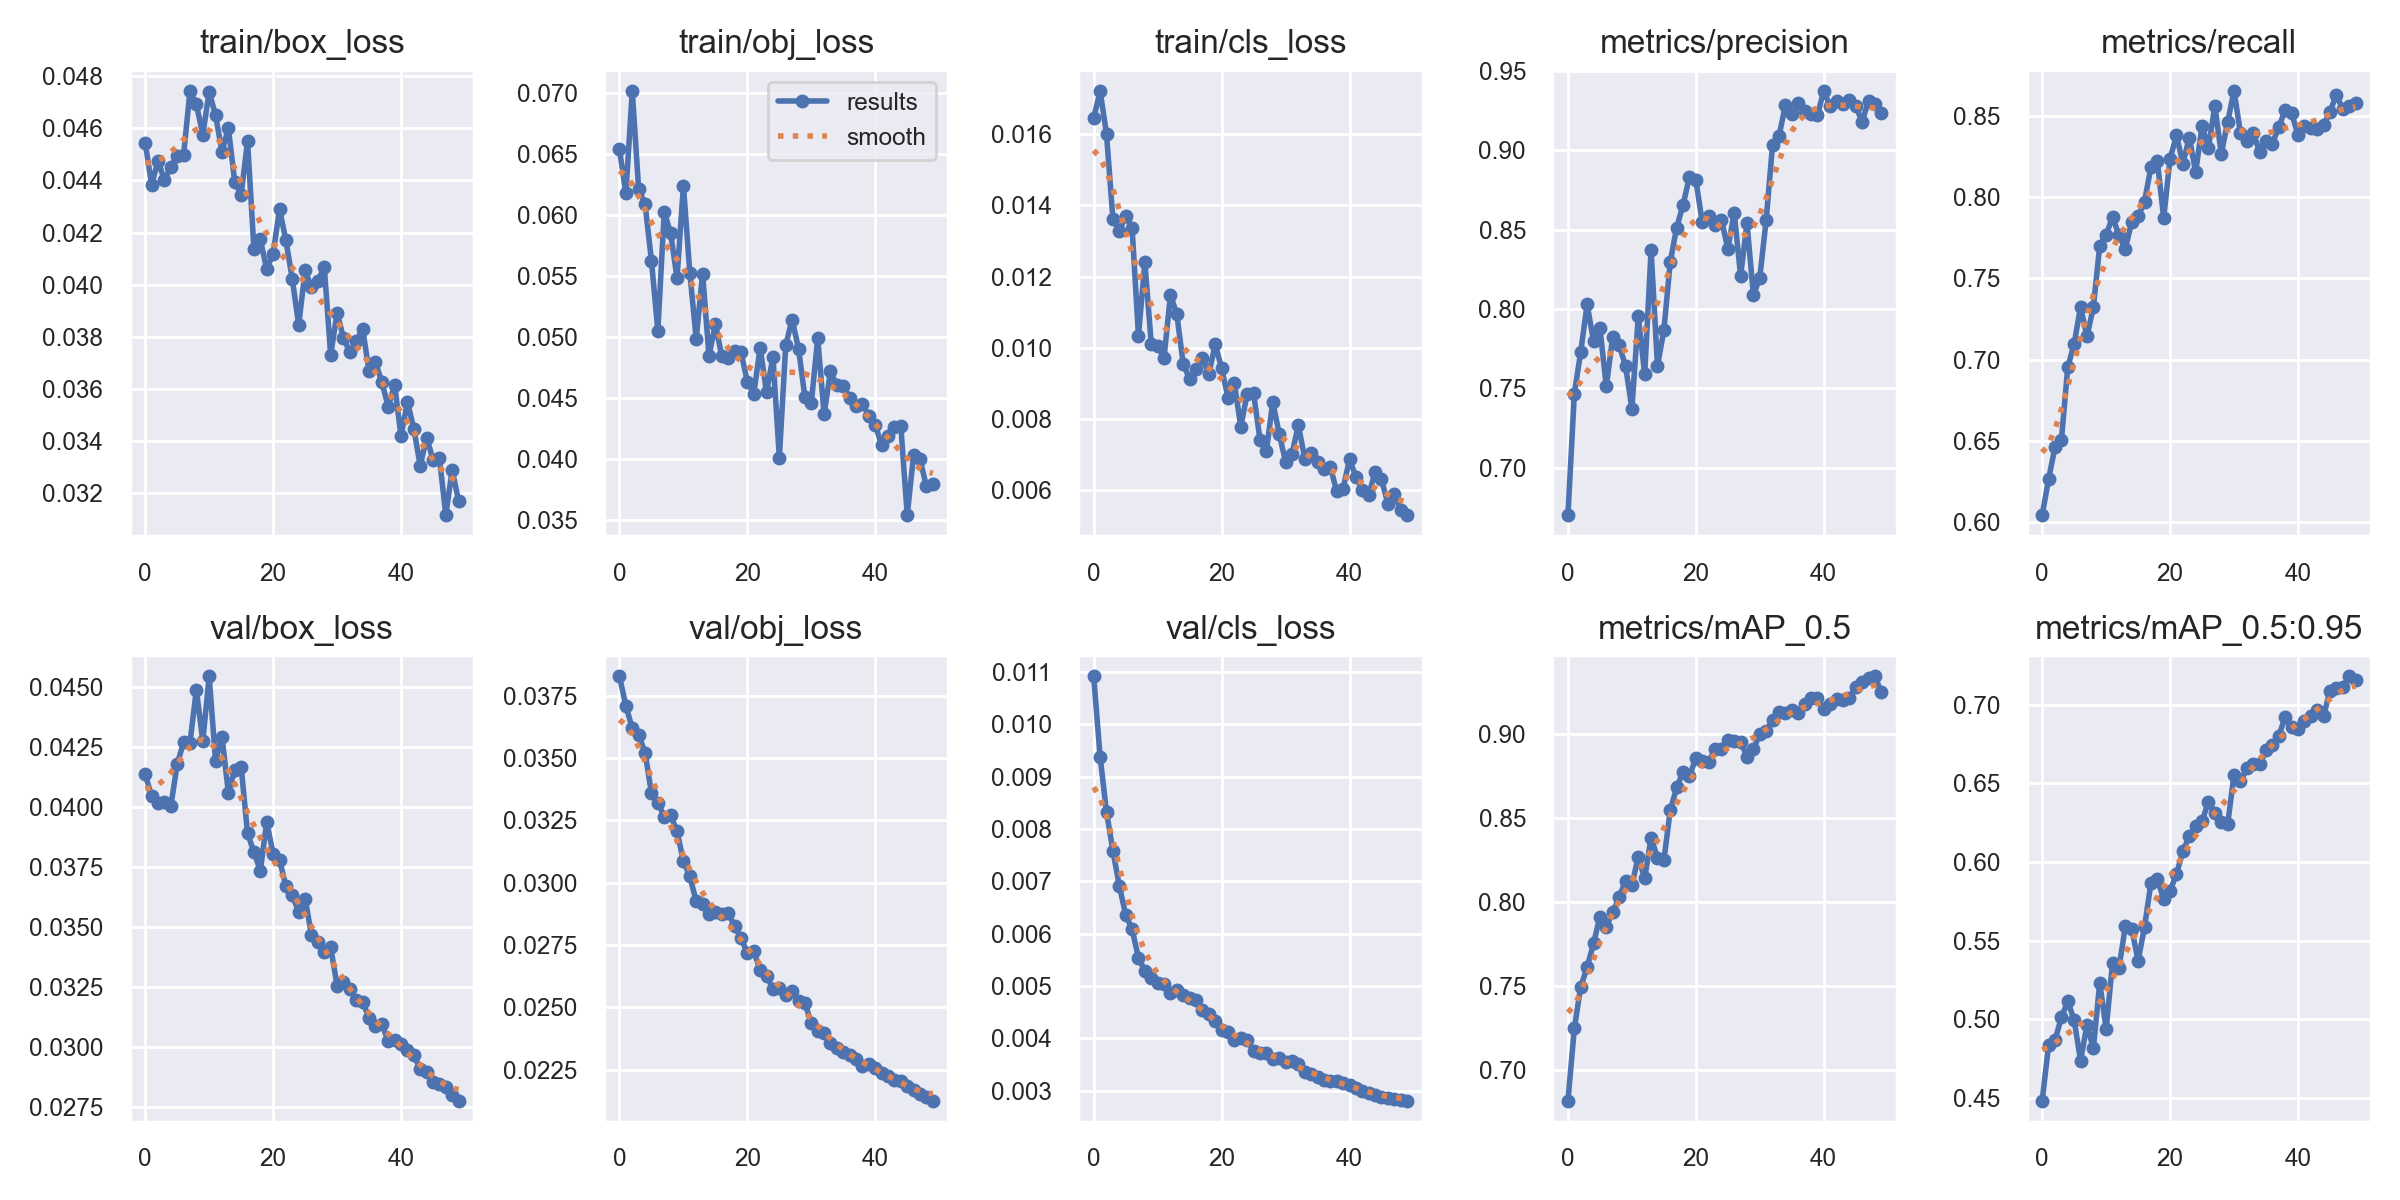

In [16]:
# 4. Ver métricas finales
display(Image(filename='runs/train/exp_mas_serio/results.png'))

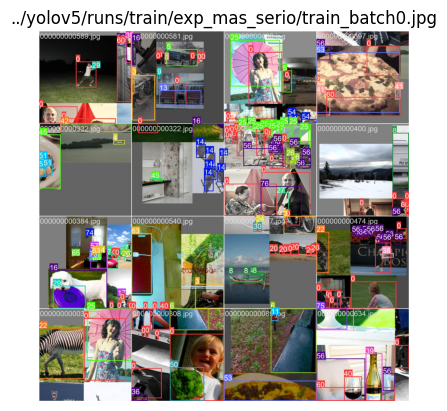

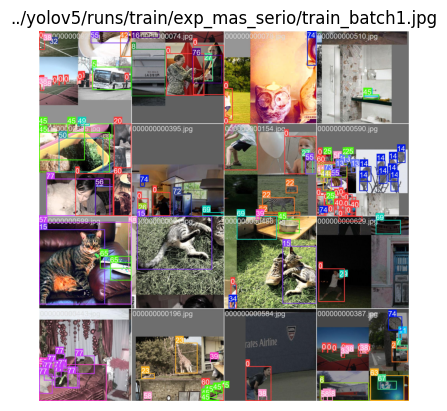

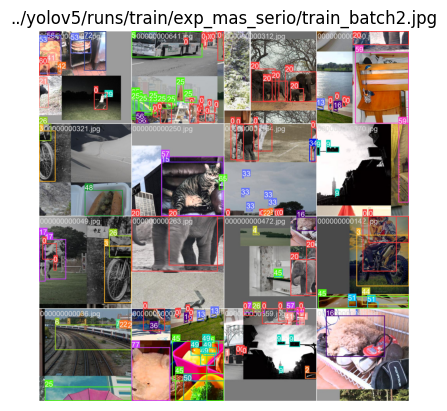

In [32]:
# 6. Mostrar detecciones
# Buscar todas las imágenes de la última detección
from PIL import Image
import matplotlib.pyplot as plt

img_paths = [
    '../yolov5/runs/train/exp_mas_serio/train_batch0.jpg',
    '../yolov5/runs/train/exp_mas_serio/train_batch1.jpg',
    '../yolov5/runs/train/exp_mas_serio/train_batch2.jpg'
]

for img_path in img_paths:
    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    plt.title(img_path)
    plt.axis('off')
plt.show()

Imagen seleccionada: ../datasets/coco128/images/train2017/000000000049.jpg


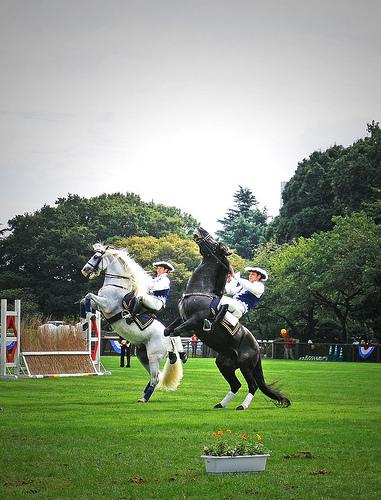

detect: weights=['runs/train/exp_mas_serio/weights/best.pt'], source=temp_input, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=detect_random, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/Users/odremanferrer/Developer/mioti/MDLM/Deep': No such file or directory
YOLOv5 🚀 2025-4-27 Python-3.9.21 torch-2.5.1 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /Users/odremanferrer/Developer/mioti/MDLM/Deep Learning/Challenger final/notebooks/yolov5/temp_input/000000000049.jpg: 640x512 9 persons, 3 horses, 1 potted plant, 61.3ms
Speed: 0.7ms pre-process, 61.3ms inference, 0.8ms NMS per imag

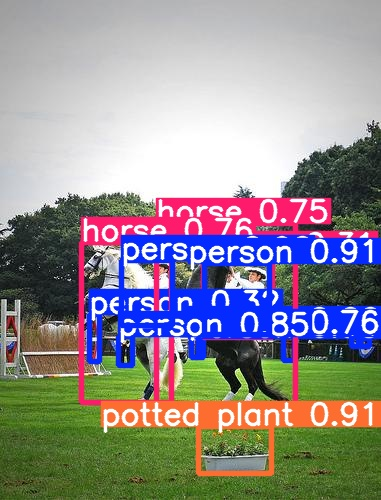

In [41]:
import random
from IPython.display import Image, display
import shutil
import glob
import os

# 7.1. Buscar imágenes de validación
val_images = glob.glob('../datasets/coco128/images/train2017/*.jpg')

# 7.2. Elegir una imagen al azar
random_image_path = random.choice(val_images)
print(f"Imagen seleccionada: {random_image_path}")

# 7.3. Mostrar la imagen original
display(Image(filename=random_image_path))

# 7.4. Ejecutar detección SOLO sobre esa imagen
# Borra y recrea la carpeta temporal para asegurar que solo hay una imagen
temp_folder = "temp_input"
if os.path.exists(temp_folder):
    shutil.rmtree(temp_folder)
os.makedirs(temp_folder, exist_ok=True)
shutil.copy(random_image_path, temp_folder)

# Detección
!python detect.py --weights runs/train/exp_mas_serio/weights/best.pt --img 640 --source temp_input --name detect_random

# 7.5. Mostrar resultado de la predicción
# Buscar la carpeta detect_random* más reciente
detect_folders = sorted(glob.glob('runs/detect/detect_random*'), key=os.path.getmtime, reverse=True)

if detect_folders:
    latest_detect_folder = detect_folders[0]
    detected_images = glob.glob(f'{latest_detect_folder}/*.jpg')
    if detected_images:
        print(f"Resultado de detección en: {latest_detect_folder}")
        display(Image(filename=detected_images[0]))
    else:
        print(f"No se encontraron imágenes en {latest_detect_folder}")
else:
    print("No se encontraron carpetas detect_random* en runs/detect/")

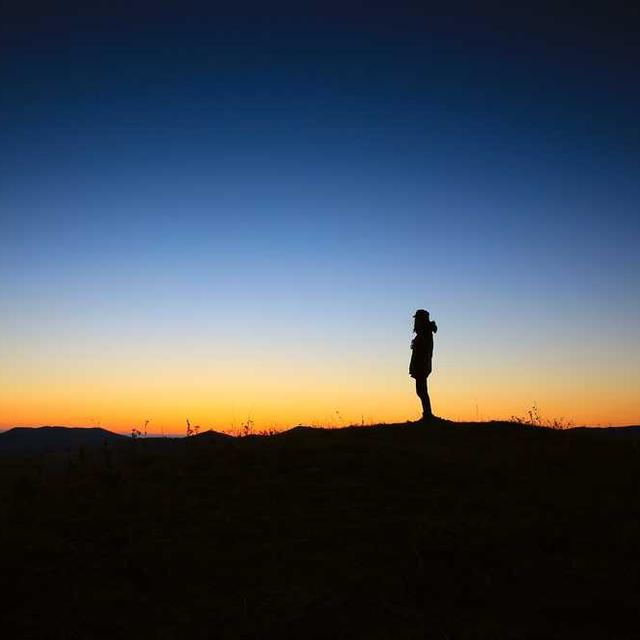

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

# Descargar una imagen random
url = 'https://picsum.photos/640'  # Esta URL devuelve una imagen aleatoria de 640x640
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')

display(img)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/odremanferrer/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-27 Python-3.9.21 torch-2.5.1 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/Users/odremanferrer/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


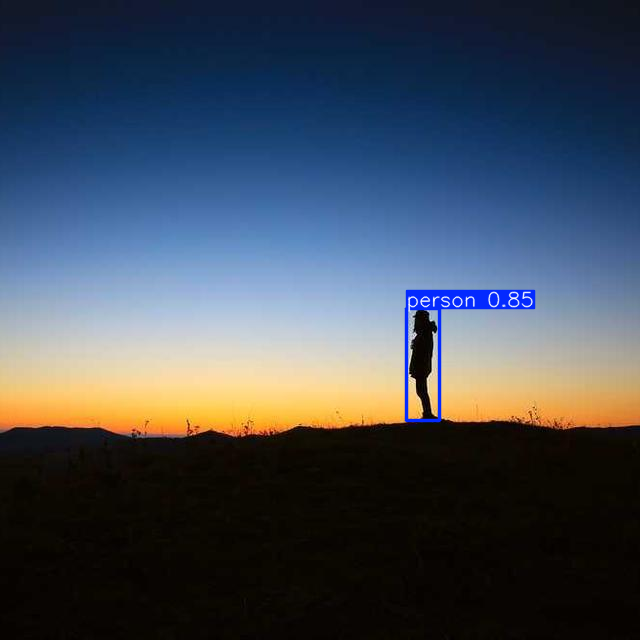

In [67]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp_mas_serio/weights/best.pt', force_reload=True)

img.save('random_image.jpg')

# Predecir usando YOLOv5
results = model('random_image.jpg')

# Mostrar los resultados
results.show()